In [34]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [35]:
def open_tboard_csv(filename, key, batch_size = 256, dataset_size = 40000):
    # File Columns:
    # wall_time, step, total_loss
    with open(filename, "rU") as f:
        f.next() # skip header line
        reader = csv.reader(f)
        rdr = [row for row in reader]
    float_rdr = [map(float,row) for row in rdr]
    float_rdr = np.array(float_rdr)
    if key == "time":
        # time in fraction of hours
        ret = ((float_rdr[:,0] - float_rdr[0,0])/3600.0) 
    elif key == "step":
        ret = float_rdr[:,1]
    elif key == "epoch":
        ret = float_rdr[:,1] * float(batch_size/dataset_size)
    else:
        # this returns accuracy
        ret = float_rdr[:,2]
    return ret  

## Import Results

In [36]:
x_axes = "step"
#x_axes = "time"
#x_axes = "epoch"


# Accuracy 
mdl1_test_acc_x = open_tboard_csv("tensorboard-data/mdl1-test_accuracy.csv", x_axes)
mdl1_test_acc_y = open_tboard_csv("tensorboard-data/mdl1-test_accuracy.csv","accuracy")

mdl1_trn_acc_x = open_tboard_csv("tensorboard-data/mdl1-train_accuracy.csv", x_axes)
mdl1_trn_acc_y = open_tboard_csv("tensorboard-data/mdl1-train_accuracy.csv","accuracy")


mdl2_test_acc_x = open_tboard_csv("tensorboard-data/mdl2-test_accuracy.csv", x_axes)
mdl2_test_acc_y = open_tboard_csv("tensorboard-data/mdl2-test_accuracy.csv","accuracy")

mdl2_trn_acc_x = open_tboard_csv("tensorboard-data/mdl2-train_accuracy.csv", x_axes)
mdl2_trn_acc_y = open_tboard_csv("tensorboard-data/mdl2-train_accuracy.csv","accuracy")

# Loss 
mdl1_loss_x = open_tboard_csv("tensorboard-data/mdl1-loss.csv", x_axes)
mdl1_loss_y = open_tboard_csv("tensorboard-data/mdl1-loss.csv","loss")

mdl2_loss_x = open_tboard_csv("tensorboard-data/mdl2-loss.csv", x_axes)
mdl2_loss_y = open_tboard_csv("tensorboard-data/mdl2-loss.csv","loss")

## Accuracy

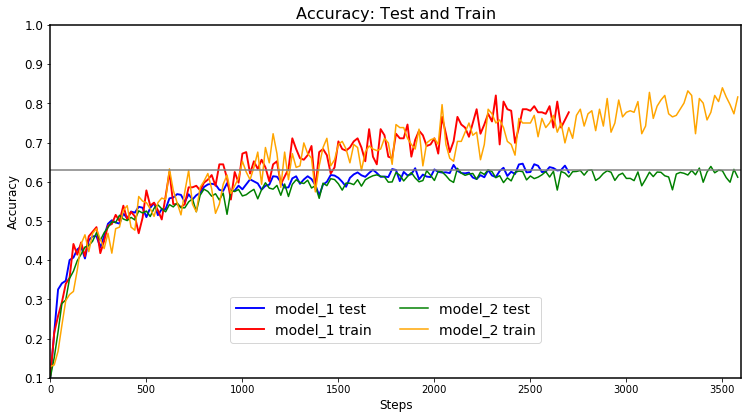

In [37]:

fig = plt.figure(figsize=(12,7))

my_fontsize=12
xlimit = 3600
    
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.yticks(fontsize=my_fontsize)

plt.title('Accuracy: Test and Train', fontsize=16)
plt.xlabel('Steps', fontsize=my_fontsize)

# Model 1 (Filters:[32, 64, 96, 64], nodes= 1024)
plt.plot(mdl1_test_acc_x,mdl1_test_acc_y, color = "Blue", linewidth=1.9, label = "model_1 test")
plt.plot(mdl1_trn_acc_x,mdl1_trn_acc_y, color = "Red", linewidth=1.9, label = "model_1 train")

# Model 2 (Filters:[32, 64, 64, 32], nodes= 512)
plt.plot(mdl2_test_acc_x,mdl2_test_acc_y, color = "Green", linewidth=1.5, label = "model_2 test")
plt.plot(mdl2_trn_acc_x,mdl2_trn_acc_y, color = "Orange", linewidth=1.5, label = "model_2 train")


ax.set_xlim([0,xlimit])
ax.set_ylim([0.1, 1.0])

plt.plot(np.linspace(0,xlimit), np.ones(len(np.linspace(0,xlimit)))*0.63, color = "gray")


plt.legend(bbox_to_anchor=(0.25, 0.25), ncol=2, fontsize=14)
plt.ylabel('Accuracy', fontsize=12)

#plt.savefig("plots/accuracy.png")


plt.show()

In [38]:
## Loss Function

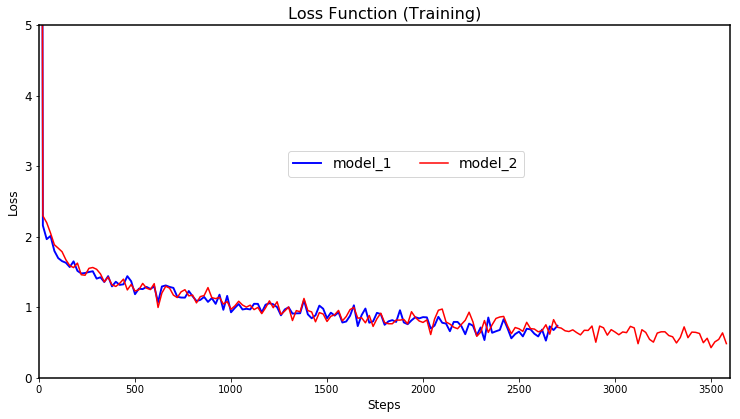

In [32]:
fig = plt.figure(figsize=(12,7))

my_fontsize=12
xlimit = 3600
    
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.yticks(fontsize=my_fontsize)

plt.title('Loss Function (Training)', fontsize=16)
plt.xlabel('Steps', fontsize=my_fontsize)

# Model 1 (Filters:[32, 64, 96, 64], nodes= 1024)
plt.plot(mdl1_loss_x,mdl1_loss_y, color = "Blue", linewidth=1.9, label = "model_1")

# Model 2 (Filters:[32, 64, 64, 32], nodes= 512)
plt.plot(mdl2_loss_x,mdl2_loss_y, color = "Red", linewidth=1.5, label = "model_2")


ax.set_xlim([0,xlimit])
ax.set_ylim([0.0, 5.0])

#plt.plot(np.linspace(0,xlimit), np.ones(len(np.linspace(0,xlimit)))*0.63, color = "gray")


plt.legend(bbox_to_anchor=(0.35, 0.55), ncol=2, fontsize=14)
plt.ylabel('Loss', fontsize=12)

#plt.savefig("plots/loss.png")

plt.show()